# **Hackethon- Shinkansen Travel Experience**
--------------------
## **Context and Problem Statement**
--------------------
This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 



-----------------------
## **Objective** 
-----------------------
The goal of the problem is:
* To understand which parameters play an important role in swaying passenger feedback towards a positive scale.
* To predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

------------------------------------
## **Dataset Description**
------------------------------------
Provided are the test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population. The detailed data dictionary is given below.


**Data Dictionary-Travel Data**

The detailed data dictionary is given below.
 * ID: The unique ID of the passenger.
 * Gender: The gender of the passenger.
 * Customet_type: Loyalty type of the passenger.
 * Age: The age of the passenger.
 * Type_Travel: Purpose of travel for the passenger.
 * Travel_Class: The train class that the passenger traveled in.
 * Travel_Distance: The distance traveled by the passenger.
 * Departure_Delay_in_Mins: The delay (in minutes) in train departure.
 * Arrival_Delay_in_Mins: The delay (in minutes) in train arrival.
 
The Target Variable: 
 * Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

## **Importing the libraries and overview of the dataset**

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [342]:
"""Customize markdown Display format"""
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

"""Customize Rows and columns Display"""
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

### **Loading the Dataset**

In [343]:
#Read and preview the train and test csv files.
survey_train = pd.read_csv("Surveydata_train.csv")
travel_train = pd.read_csv("Traveldata_train.csv")
survey_test = pd.read_csv("Surveydata_test.csv")
travel_test = pd.read_csv("Traveldata_test.csv")
bold("Preview of Train Data:")
display(survey_train.head(2))
display(travel_train.head(2))
bold("Preview of Test Data:")
display(survey_test.head(2))
display(travel_test.head(2))

**Preview of Train Data:**

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0


**Preview of Test Data:**

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0


In [344]:
#Merging the train datasets
train = pd.merge(survey_train, travel_train, how='outer')
bold("Preview of Merged Data:")
display(train.head(5))
display(train.tail(5))

**Preview of Merged Data:**

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [345]:
#Merging the train datasets
test = pd.merge(survey_test, travel_test, how='outer')
bold("Preview of Merged Data:")
display(test.head(5))
display(test.tail(5))

**Preview of Merged Data:**

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


### **Checking the info of the Merge Train dataset**

In [346]:
#Information about our train dataset

bold("Information about  our Data:")
display(train.info())

#Shape of the data
bold("Shape of the data:")
display(train.shape)

#Variable datatypes
bold("Data Types of the Variables:")
display(train.dtypes) 

#Variables in the combined the dataset
bold("Name of the Variables in  data:")
display(train.columns)

**Information about  our Data:**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

None

**Shape of the data:**

(94379, 25)

**Data Types of the Variables:**

ID                           int64
Overall_Experience           int64
Seat_Comfort                object
Seat_Class                  object
Arrival_Time_Convenient     object
Catering                    object
Platform_Location           object
Onboard_Wifi_Service        object
Onboard_Entertainment       object
Online_Support              object
Ease_of_Online_Booking      object
Onboard_Service             object
Legroom                     object
Baggage_Handling            object
CheckIn_Service             object
Cleanliness                 object
Online_Boarding             object
Gender                      object
Customer_Type               object
Age                        float64
Type_Travel                 object
Travel_Class                object
Travel_Distance              int64
Departure_Delay_in_Mins    float64
Arrival_Delay_in_Mins      float64
dtype: object

**Name of the Variables in  data:**

Index(['ID', 'Overall_Experience', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'], dtype='object')

**Observations:**

- There are **94319 observations and 25 columns** in the train dataset.
- All the columns do not have the same number of non-null values, i.e., **there are a lot of missing values in the train data.**

**Let's check the unique values in each column** 

In [347]:
# Checking unique values in each column
train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

**Observations:**

- **Employee number is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [348]:
# Dropping the columns 
train=train.drop(['ID'],axis=1)
test=test.drop(['ID'],axis=1)

In [349]:
# Creating numerical columns
num_cols=['Age','Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Creating categorical variables 
cat_cols= ['Overall_Experience', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 
           'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
           'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 
           'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class'
           ]

In [350]:
bold("Categories of each categorical Variables")
for i in cat_cols:
    print(train[i].value_counts(normalize=True))
    print('*'*40)

**Categories of each categorical Variables**

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
****************************************
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: Catering, dtype: float64
**************************************

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**



In [351]:
# Checking summary statistics
train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


**Observations:**

- **Average passenger age is around 39.5 years**. It has a high range, from 7 years to 85. So the age distribution of passengers is very diverse. **The variable age is nearly symmetric.**

- **Average Travel_Distance is around 1979 units**. It also has a high range, from 50 units  to 6951 unit distance. So the travel_distance distribution of passengers is also very diverse. **The variable Travel_Distance is slightly right-skewed.**
- **The average Departure_Delay_in_Mins is nearly 15 minutes.**  However, there are some passengers who experienced a high departure delay with a maximum of 1592 minutes. **This variable is right skewed.**
- **The average Arrival_Delay_in_Mins is about 15 minutes,**  with some passengers experiencing a high arrival delay with a maximum of 1584 minutes. Probably, the same passenger who had a high departure delay. **This variable is also right skewed.**

- The majority of passengers departured and arrived on little to no time delay.

**Let's explore these variables in some more depth by observing their distributions**

In [352]:
# Function to plot a boxplot and a histogram along the same scale 

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None): 

    """ 

    Boxplot and histogram combined 

 

    data: dataframe 

    feature: dataframe column 

    figsize: size of figure (default (12,7)) 

    kde: whether to the show density curve (default False) 

    bins: number of bins for histogram (default None) 

    """ 

    f2, (ax_box2, ax_hist2) = plt.subplots( 

        nrows = 2,      # Number of rows of the subplot grid = 2 

        sharex = True,  # x-axis will be shared among all subplots 

        gridspec_kw = {"height_ratios": (0.25, 0.75)}, 

        figsize = figsize, 

    )                   # Creating the 2 subplots 

    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet" 

    )                   # Boxplot will be created and a star will indicate the mean value of the column 

    sns.histplot( 

        data = df, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter" 

    ) if bins else sns.histplot( 

        data = df, x = feature, kde = kde, ax = ax_hist2 

    )                   # For histogram 

    ax_hist2.axvline( 

        df[feature].mean(), color = "green", linestyle = "--" 

    )                   # Add mean to the histogram 

    ax_hist2.axvline( 

        df[feature].median(), color = "black", linestyle = "-" 

    )                   # Add median to the histogram 


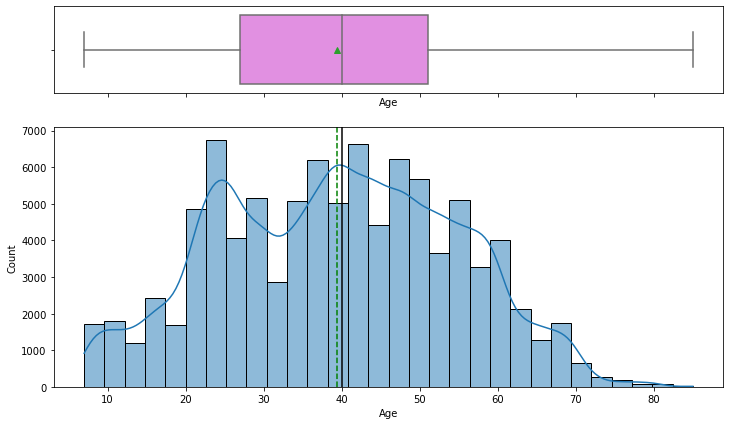

In [353]:
histogram_boxplot(train, "Age", kde = True, bins = 30) 

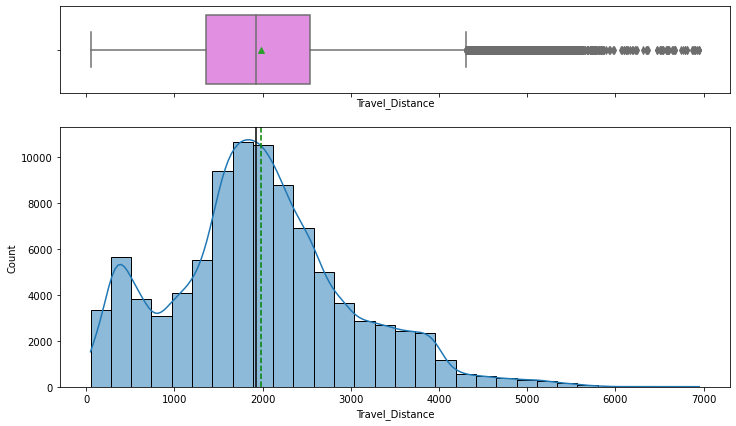

In [354]:
histogram_boxplot(train, "Travel_Distance", kde = True, bins = 30) 

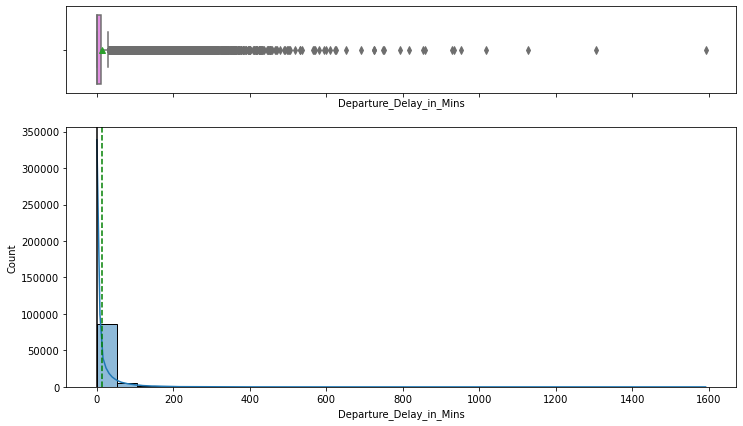

In [355]:
histogram_boxplot(train, "Departure_Delay_in_Mins", kde = True, bins = 30) 

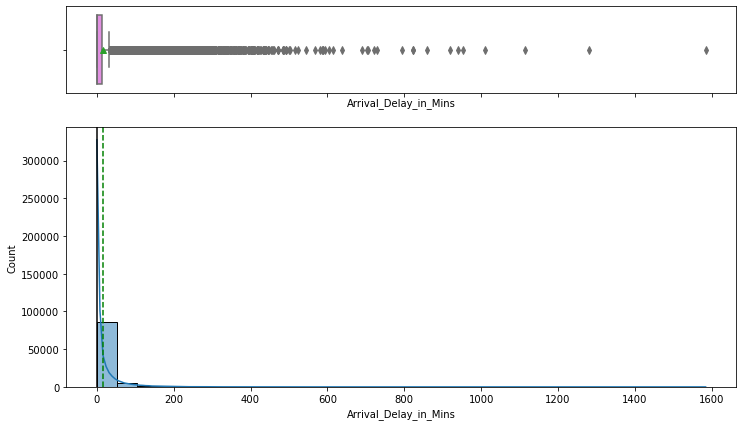

In [356]:
histogram_boxplot(train, "Arrival_Delay_in_Mins", kde = True, bins = 30) 

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of passengers between the ages of 25 and around 62.

- **The Travel_Distance is skewed to the right**, implying that just a few passengers are travelling very long distances.
- As stated above, **The variables Departure_Delay_in_Mins and average Arrival_Delay_in_Mins right skewed, with nearly all passengers departing and arriving with little to no time delay.**
- The variables **Travel_Distance, Departure_Delay_in_Mins and average Arrival_Delay_in_Mins have a lot of outliers.**

### **Univariate analysis for categorical variables**

In [357]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(train[i].value_counts(normalize=True))
    print('*'*40)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
****************************************
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: Catering, dtype: float64
**************************************

**Observations:**

- **The passengers satisfied Overall_Experience rate is nearly 55%.**
- **Only About 0.224+0.218+0.137= ~58% of the passengers had at least an acceptable experience with Seat_Comfort.**
- **Only About 0.229+0.207+0.177= ~61% of the passengers had at least an acceptable experience with the arrival time.** 
- **Nearly 0.256+0.232+0.148= ~64% of the passengers found the Platform_Location at least Manageable.**
- **Nearly 0.242+0.222+0.213= ~68% of the passengers found the Onboard_Wifi_Service at least Acceptable.**
- **Nearly 0.323+0.229+0.186= ~74% of the passengers found the Onboard_Entertainment at least Acceptable.**
- **Nearly 0.318+0.274+0.166= ~76% of the passengers found the Online_Support at least Acceptable.**
- **Nearly 0.307+0.262+0.174= ~74% of the passengers found the Ease_of_Online_Booking at least Acceptable.**
- **Nearly 0.314+0.245+0.208= ~77% of the passengers found the Onboard_Services at least Acceptable.**
- **Nearly 0.306+0.263+0.174= ~74% of the passengers found the Legroom at least Acceptable.**
- **Nearly 0.371+0.276+0.189= ~84% of the passengers found the Baggage_Handling at least Acceptable.**
- **Nearly 0.281+0.274+0.208= ~763% of the passengers found the CheckIn_Service at least Acceptable.**
- **Nearly 0.375+0.276+0.184= ~84% of the passengers found the Cleanliness at least Acceptable.**
- **Nearly 0.270+0.238+0.230= ~74% of the passengers found the Online_Boarding at least Acceptable.**
- **About half of the passengers are females and half are males.**
- **About 81.7% of the passengers are Loyal Customer.**
- **About 69% of the passengers are in Business Travel.**
- **Just a little more than 50% of passengers were in the Economy class.**

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does satisfaction rate is related with other categorical variables.

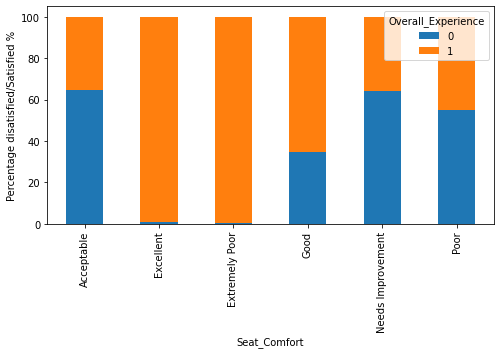

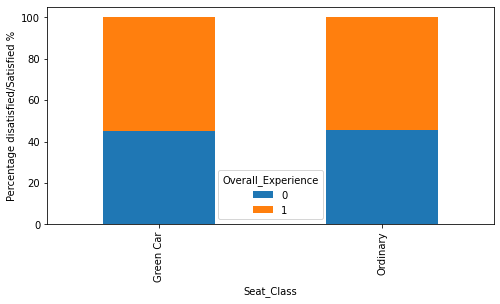

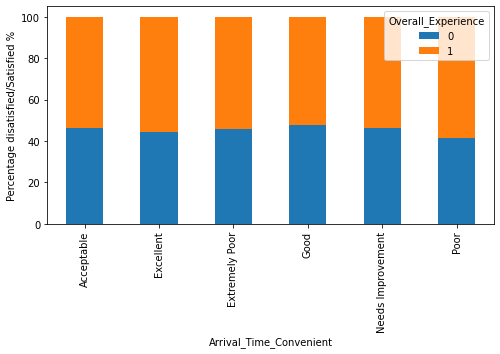

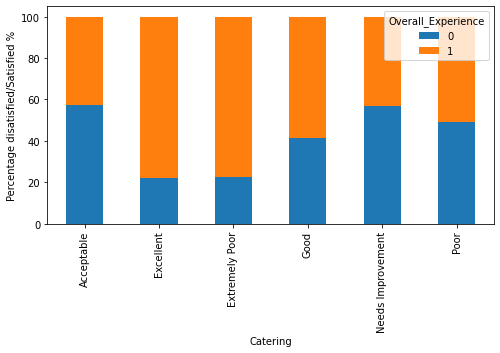

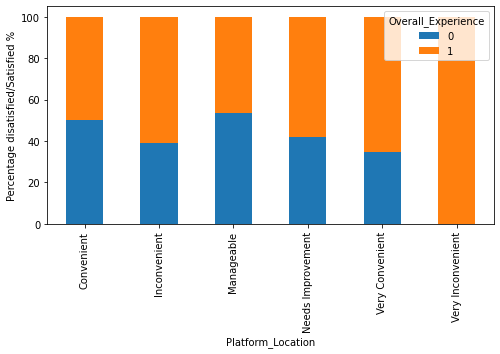

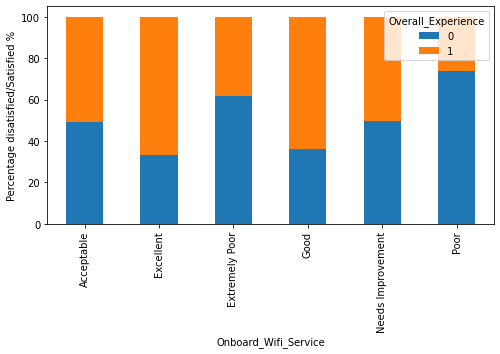

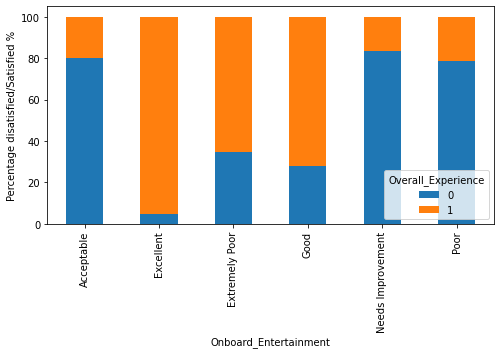

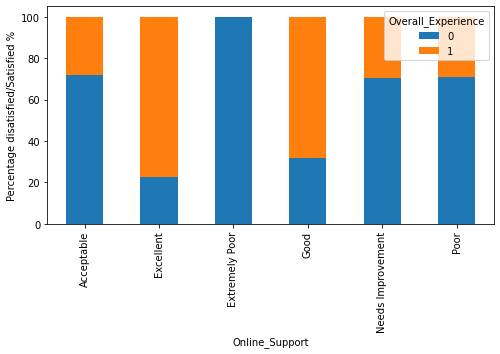

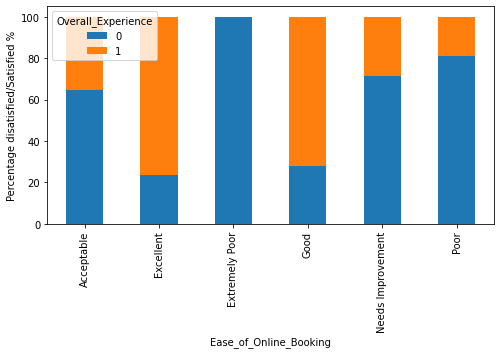

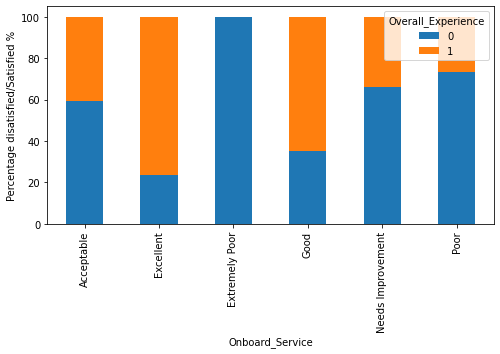

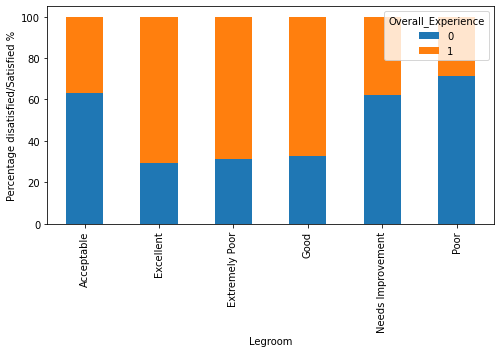

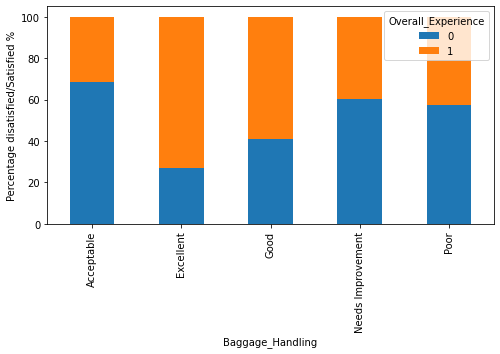

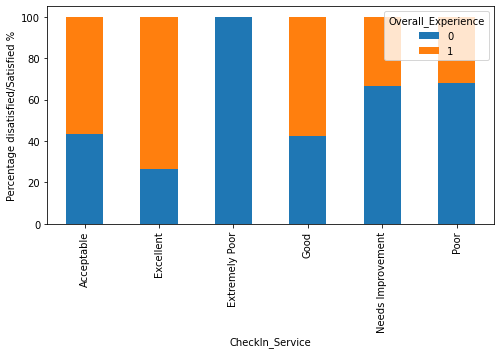

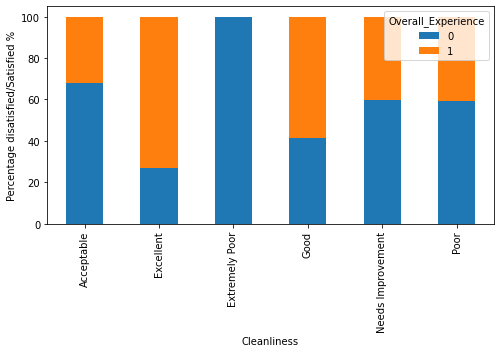

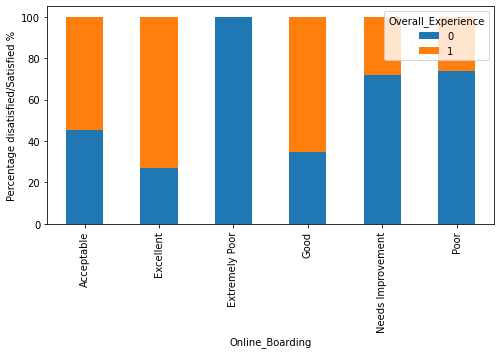

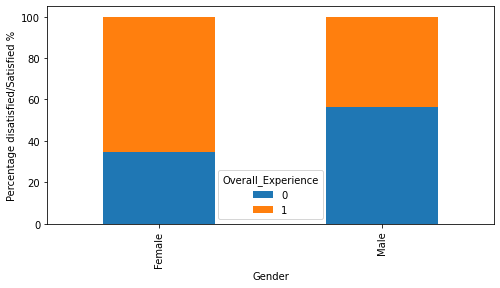

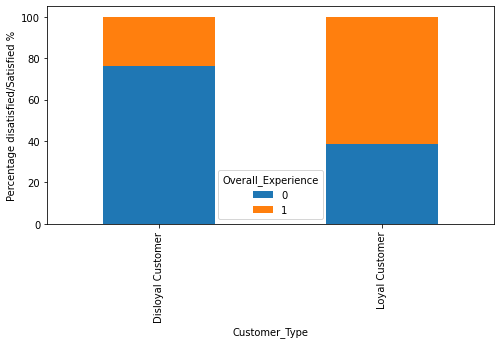

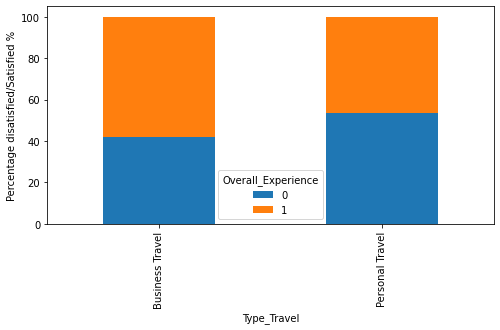

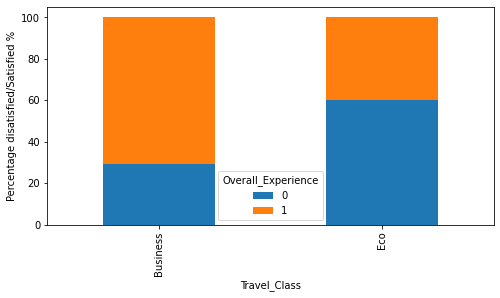

In [358]:
for i in cat_cols:
    if i!='Overall_Experience':
        (pd.crosstab(train[i],train['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage disatisfied/Satisfied %')

**Observations:**
    
- **Passengers who had an extremely poor experience with any of the services most likely had an overall disatisfied experience.**
- There is little to no association between the variable **Seat class,** **Arrival_time_Convenient**  and **Overall_Experience.** But we are going to keep them in the analysis and confirmn their lack of importance later.

- As expected, passengers in the business class had a better experience  than passengers in the Economy class.
- Also as expected, Loyal customers  had a better experience  than passengers that are not loyal customers.
- Females had a better experience than males.
- It appears, surprisingly,  that for half of the variables, passengers who thought that the services on the Shinkansen Bullet Train need improvement were as much disatisfied as those who rated these services poor, and in the other half of the variables, passengers who thought that the services on the Shinkansen Bullet Train need improvement were as much disatisfied as those who rated these services as acceptable.
- Another surprising remark is that passengers who rated seat comfort as extremely poor and those who rated it as excellent had the same overall travel experience.

**Let's check the relationship between Overall_Experience and Numerical variables**

In [359]:
# Mean of numerical variables grouped by attrition
train.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.49018,2025.826088,17.738600,18.392374
1,41.01968,1939.962650,12.083107,12.196763


**Observations:**
- **Passengers satisfied with their travel experience are a little older than passengers disatisfied with their travel experience.** These could be due to onboard services like  wifi and   entertainment.
- Passengers who travelled farther were most likely to be disatisfied.
- As expected, passengers who experienced more departure or arrival delays on average were most likely to be satisfied.

**We have found out what type of passengers were likely to be satisfied with their overall travel performance.**

### **Let's check the relationship between different numerical variables**

<AxesSubplot:>

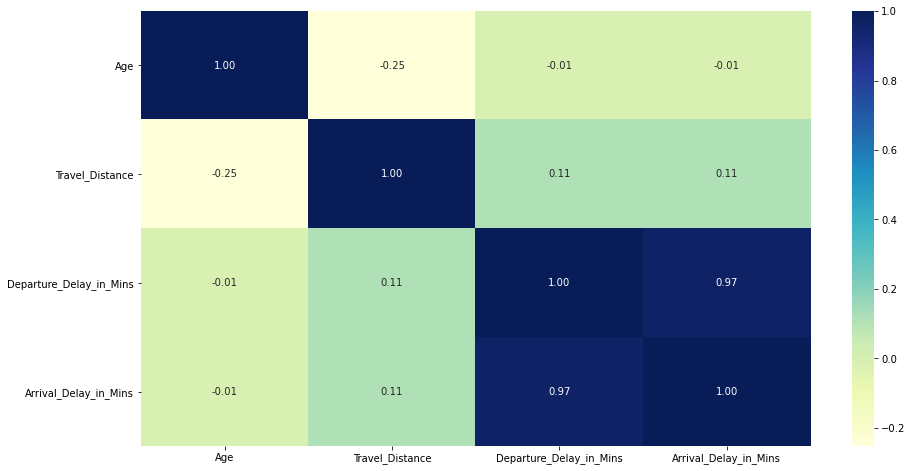

In [360]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(train[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

<AxesSubplot:>

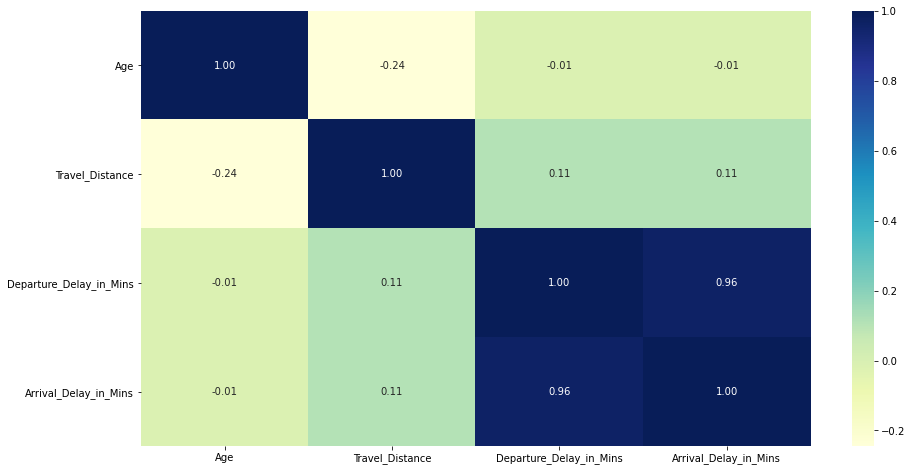

In [361]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(test[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- As expected, **Departure_Delay_in_Mins** and **Arrival_Delay_in_Mins** are strongly correlated. 
- There is a little correlation between the Travel_distance and the Age. 
- No other correlation exists between these variables.

We drop one of the two strongly corelated variables (Say Arrival_Delay_in_Mins ) to avoid multicollinearity. 

In [362]:
train = train.drop('Arrival_Delay_in_Mins', axis = 1)

In [363]:
test = test.drop('Arrival_Delay_in_Mins', axis = 1)

**Now we have explored our data. Let's build the model**

## **Model Building - Approach**

1. Feature Engeniering.
2. Build a model on the train data.
3. Tune the model if required.
4. Test the model on the test data.

### **Feature Engeniering**

#### Removing Outliers

There is no need to remove outliers since we will use algorithms that are resistent to outliers.

#### Imputing Missing Values in Variables

In [364]:
#Checking missing data
train.isnull().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
Gender                       77
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Onboard_Wifi_Service         30
Platform_Location            30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Seat_Class                    0
Travel_Class                  0
Travel_Distance               0
Overall_Experience            0
dtype: int64

In [365]:
#Checking missing data
test.isnull().sum().sort_values(ascending=False)

Type_Travel                3448
Customer_Type              3383
Catering                   3357
Arrival_Time_Convenient    3325
Onboard_Service            2872
Baggage_Handling             40
Gender                       30
Departure_Delay_in_Mins      29
Online_Support               26
Legroom                      25
CheckIn_Service              22
Seat_Comfort                 22
Ease_of_Online_Booking       18
Onboard_Wifi_Service         12
Platform_Location            12
Age                          11
Onboard_Entertainment         8
Cleanliness                   2
Online_Boarding               2
Seat_Class                    0
Travel_Class                  0
Travel_Distance               0
dtype: int64

In [366]:
#Checking the percentage of null data in each variable
display(round(train.isna().sum()/len(train)*100,5).sort_values(ascending=False))

Type_Travel                9.77548
Customer_Type              9.48410
Arrival_Time_Convenient    9.46185
Catering                   9.26159
Onboard_Service            8.05370
Baggage_Handling           0.15046
Online_Support             0.09642
Legroom                    0.09536
Gender                     0.08159
CheckIn_Service            0.08159
Ease_of_Online_Booking     0.07735
Seat_Comfort               0.06463
Departure_Delay_in_Mins    0.06039
Age                        0.03497
Onboard_Wifi_Service       0.03179
Platform_Location          0.03179
Onboard_Entertainment      0.01907
Cleanliness                0.00636
Online_Boarding            0.00636
Seat_Class                 0.00000
Travel_Class               0.00000
Travel_Distance            0.00000
Overall_Experience         0.00000
dtype: float64

Since we have less than 10% missing data in all the   variables, we will not drop any columns and will impute the NaN values using the mode, the mean and the median for categorical variables and symmetric and skewed numerical variables respectively.

 ##### Imputing missing values in the variable Customer_Type

In [367]:
train["Customer_Type"].mode()

0    Loyal Customer
dtype: object

In [368]:
train.Customer_Type.fillna(value="Loyal Customer", inplace = True)

In [369]:
test.Customer_Type.fillna(value="Loyal Customer", inplace = True)

 ##### Imputing missing values in the variable Arrival_Time_Convenient

In [370]:
train["Arrival_Time_Convenient"].mode()

0    Good
dtype: object

In [371]:
#Imputing with the mode since variable is categorical
train.Arrival_Time_Convenient.fillna(value="Good", inplace = True)

In [372]:
test.Arrival_Time_Convenient.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Onboard_Service

In [373]:
display(train["Onboard_Service"].mode())
display(test["Onboard_Service"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [374]:
#Imputing with the mode since variable is categorical
train.Onboard_Service.fillna(value="Good", inplace = True)

In [375]:
test.Onboard_Service.fillna(value="Good", inplace = True)

##### Imputing missing values in the variable Catering

In [376]:
display(train["Catering"].mode())
display(test["Catering"].mode())

0    Acceptable
dtype: object

0    Acceptable
dtype: object

In [377]:
#Imputing with the mode since variable is categorical
train.Catering.fillna(value="Excellent", inplace = True)

In [378]:
#Imputing with the mode since variable is categorical
test.Catering.fillna(value="Acceptable", inplace = True)

 ##### Imputing missing values in the variable Type_Travel

In [379]:
display(train["Type_Travel"].mode())
display(test["Type_Travel"].mode())

0    Business Travel
dtype: object

0    Business Travel
dtype: object

In [380]:
train.Type_Travel.fillna(value="Business Travel", inplace = True)

In [381]:
test.Type_Travel.fillna(value="Business Travel", inplace = True)

 ##### Imputing missing values in the variable Gender

In [382]:
display(train["Gender"].mode())
display(test["Gender"].mode())

0    Female
dtype: object

0    Female
dtype: object

In [383]:
train.Gender.fillna(value="Female", inplace = True)

In [384]:
test.Gender.fillna(value="Female", inplace = True)

 ##### Imputing missing values in the variable Baggage_Handling

In [385]:
#Imputing with the mode since variable is categorical
display(train["Baggage_Handling"].mode())
display(test["Baggage_Handling"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [386]:
train.Baggage_Handling.fillna(value="Good", inplace = True)

In [387]:
test.Baggage_Handling.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Online_Support

In [388]:
#Imputing with the mode since variable is categorical
display(train["Online_Support"].mode())
display(test["Online_Support"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [389]:
#Imputing with the mode since variable is categorical
train.Online_Support.fillna(value="Good", inplace = True)
test.Online_Support.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Legroom

In [390]:
#Imputing with the mode since variable is categorical
display(train["Legroom"].mode())
display(test["Legroom"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [391]:
#Imputing with the mode since variable is categorical
train.Legroom.fillna(value="Good", inplace = True)
test.Legroom.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Ease_of_Online_Booking

In [392]:
#Imputing with the mode since variable is categorical
display(train["Ease_of_Online_Booking"].mode())
display(test["Ease_of_Online_Booking"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [393]:
#Imputing with the mode since variable is categorical
train.Ease_of_Online_Booking.fillna(value="Good", inplace = True)
test.Ease_of_Online_Booking.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Seat_Comfort

In [394]:
#Imputing with the mode since variable is categorical
display(train["Seat_Comfort"].mode())
display(test["Seat_Comfort"].mode())

0    Acceptable
dtype: object

0    Acceptable
dtype: object

In [395]:
#Imputing with the mode since variable is categorical
train.Seat_Comfort.fillna(value="Acceptable", inplace = True)
test.Seat_Comfort.fillna(value="Acceptable", inplace = True)

 ##### Imputing missing values in the variable CheckIn_Service

In [396]:
#Imputing with the mode since variable is categorical
display(train["CheckIn_Service"].mode())
display(test["CheckIn_Service"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [397]:
#Imputing with the mode since variable is categorical
train.CheckIn_Service.fillna(value="Good", inplace = True)
test.CheckIn_Service.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Onboard_Wifi_Service

In [398]:
#Imputing with the mode since variable is categorical
display(train["Onboard_Wifi_Service"].mode())
display(test["Onboard_Wifi_Service"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [399]:
#Imputing with the mode since variable is categorical
train.Onboard_Wifi_Service.fillna(value="Good", inplace = True)
test.Onboard_Wifi_Service.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Platform_Location

In [400]:
#Imputing with the mode since variable is categorical
display(train["Platform_Location"].mode())
display(test["Platform_Location"].mode())

0    Manageable
dtype: object

0    Manageable
dtype: object

In [401]:
#Imputing with the mode since variable is categorical
train.Platform_Location.fillna(value="Manageable", inplace = True)
test.Platform_Location.fillna(value="Manageable", inplace = True)

 ##### Imputing missing values in the variable Onboard_Entertainment

In [402]:
#Imputing with the mode since variable is categorical
display(train["Onboard_Entertainment"].mode())
display(test["Onboard_Entertainment"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [403]:
#Imputing with the mode since variable is categorical
train.Onboard_Entertainment.fillna(value="Good", inplace = True)
test.Onboard_Entertainment.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Cleanliness

In [404]:
#Imputing with the mode since variable is categorical
display(train["Cleanliness"].mode())
display(test["Cleanliness"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [405]:
#Imputing with the mode since variable is categorical
train.Cleanliness.fillna(value="Good", inplace = True)
test.Cleanliness.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Online_Boarding

In [406]:
#Imputing with the mode since variable is categorical
display(train["Online_Boarding"].mode())
display(test["Online_Boarding"].mode())

0    Good
dtype: object

0    Good
dtype: object

In [407]:
#Imputing with the mode since variable is categorical
train.Online_Boarding.fillna(value="Good", inplace = True)
test.Online_Boarding.fillna(value="Good", inplace = True)

 ##### Imputing missing values in the variable Departure_Delay_in_Mins

In [408]:
#Imputing with the median since variable is skewed
display(train["Departure_Delay_in_Mins"].median())
display(test["Departure_Delay_in_Mins"].median())

0.0

0.0

In [409]:
#Imputing with the mode since variable is categorical
train.Departure_Delay_in_Mins.fillna(value=0, inplace = True)
test.Departure_Delay_in_Mins.fillna(value=0, inplace = True)

 ##### Imputing missing values in the variable Age

In [410]:
#Imputing with the median since variable is symmetric
display(train["Age"].mean())
display(test["Age"].mean())

39.41964683187417

39.446995026832624

In [411]:
#Imputing with the median since variable is quantitative and skewed to the right.
train.Age.fillna(value =39.42 , inplace = True)
test.Age.fillna(value =39.45 , inplace = True)

In [412]:
#Cheking missing data
train.isnull().sum().sort_values(ascending=False)

Overall_Experience         0
Baggage_Handling           0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
Gender                     0
Online_Boarding            0
Cleanliness                0
CheckIn_Service            0
Legroom                    0
Seat_Comfort               0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Seat_Class                 0
Departure_Delay_in_Mins    0
dtype: int64

In [413]:
#Cheking missing data
test.isnull().sum().sort_values(ascending=False)

Seat_Comfort               0
Seat_Class                 0
Travel_Distance            0
Travel_Class               0
Type_Travel                0
Age                        0
Customer_Type              0
Gender                     0
Online_Boarding            0
Cleanliness                0
CheckIn_Service            0
Baggage_Handling           0
Legroom                    0
Onboard_Service            0
Ease_of_Online_Booking     0
Online_Support             0
Onboard_Entertainment      0
Onboard_Wifi_Service       0
Platform_Location          0
Catering                   0
Arrival_Time_Convenient    0
Departure_Delay_in_Mins    0
dtype: int64

#### Encoding Categorical Variables

In [414]:
#Encoding the categorical variables
train.replace({'Seat_Comfort':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Arrival_Time_Convenient':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Catering':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'Platform_Location':{'Very Inconvenient':0,'Inconvenient':1, 'Needs Improvement':2, 'Manageable':3,'Convenient':4, 'Very Convenient':5}},inplace=True)
train.replace({'Onboard_Wifi_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Onboard_Entertainment':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'Online_Support':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Ease_of_Online_Booking':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'Onboard_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Legroom':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Baggage_Handling':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'CheckIn_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
train.replace({'Cleanliness':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'Online_Boarding':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

train.replace({'Seat_Class':{'Ordinary':0,'Green Car':1}},inplace=True)
train.replace({'Customer_Type':{'Disloyal Customer':0,'Loyal Customer':1}},inplace=True)
train.replace({'Type_Travel':{'Personal Travel':0,'Business Travel':1}},inplace=True)
train.replace({'Travel_Class':{'Eco':0,'Business':1}},inplace=True)

In [415]:
#Encoding the categorical variables
test.replace({'Seat_Comfort':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Arrival_Time_Convenient':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Catering':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'Platform_Location':{'Very Inconvenient':0,'Inconvenient':1, 'Needs Improvement':2, 'Manageable':3,'Convenient':4, 'Very Convenient':5}},inplace=True)
test.replace({'Onboard_Wifi_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Onboard_Entertainment':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'Online_Support':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Ease_of_Online_Booking':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'Onboard_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Legroom':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Baggage_Handling':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'CheckIn_Service':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)
test.replace({'Cleanliness':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'Online_Boarding':{'Extremely Poor':0,'Poor':1, 'Needs Improvement':2, 'Acceptable':3,'Good':4, 'Excellent':5}},inplace=True)

test.replace({'Seat_Class':{'Ordinary':0,'Green Car':1}},inplace=True)
test.replace({'Customer_Type':{'Disloyal Customer':0,'Loyal Customer':1}},inplace=True)
test.replace({'Type_Travel':{'Personal Travel':0,'Business Travel':1}},inplace=True)
test.replace({'Travel_Class':{'Eco':0,'Business':1}},inplace=True)

In [416]:
# Creating list of dummy columns
to_get_dummies_for = ['Gender']
# Creating dummy variables
train = pd.get_dummies(data = train, columns = to_get_dummies_for, drop_first = True)

In [417]:
# Creating dummy variables
test = pd.get_dummies(data = test, columns = to_get_dummies_for, drop_first = True)

**Separating the independent variables (X) and the dependent variable (Y)**

In [418]:
# Separating target variable and other variables

Y= train.Overall_Experience
X= train.drop(columns = ['Overall_Experience'])

**Splitting the data into 70% train and 30% test set**

We will split our train dataset into two sets fro traning models and testing models.   We will use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and testing fold.

In [419]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1, stratify = Y)

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for **Logistic Regression** and **SVM**.  We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [420]:
# Scaling the train data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test part of the train data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [421]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_Comfort             35602 non-null  int64  
 1   Seat_Class               35602 non-null  int64  
 2   Arrival_Time_Convenient  35602 non-null  int64  
 3   Catering                 35602 non-null  int64  
 4   Platform_Location        35602 non-null  int64  
 5   Onboard_Wifi_Service     35602 non-null  int64  
 6   Onboard_Entertainment    35602 non-null  int64  
 7   Online_Support           35602 non-null  int64  
 8   Ease_of_Online_Booking   35602 non-null  int64  
 9   Onboard_Service          35602 non-null  int64  
 10  Legroom                  35602 non-null  int64  
 11  Baggage_Handling         35602 non-null  int64  
 12  CheckIn_Service          35602 non-null  int64  
 13  Cleanliness              35602 non-null  int64  
 14  Online_Boarding       

In [422]:
# Fit_transform on test data
test_scaled=sc.fit_transform(test)
test_scaled=pd.DataFrame(test_scaled, columns=test.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a passenger will be satisfied when the employee is not satisfied
2. Predicting a passenger is not satisfied when the employee is actually satisfied

**Which case is more important?**

* **Predicting that the passenger will be satisfied but the passenger is not satisfied**, i.e., losing out a valuable customer. This would be considered a major miss for any passenger attrition predictor and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False positives?**
* **The company would want the Precision to be maximized**, the greater the Precision, the higher the chances of minimizing false positives. Hence, the focus should be on increasing the Precision (minimizing the false positives) or, in other words, identifying the true negatives (i.e. Class 0) very well, so that the company can provide incentives to control the satisfaction rate especially, for loyal customers. This would help in optimizing the overall project cost towards retaining the loyal customers frequently using the train for travel, especially business class passengers.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [423]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.4f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**


### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [424]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     38507
           1       0.84      0.85      0.85     46434

    accuracy                           0.83     84941
   macro avg       0.83      0.83      0.83     84941
weighted avg       0.83      0.83      0.83     84941



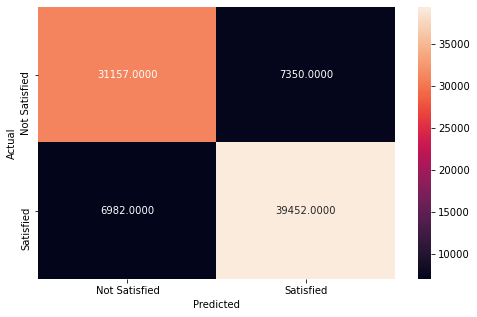

In [425]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the passengers that are satisfied.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a passenger would not be satisfied and the passenger is not satisfied. 

* False Positive (Actual=0, Predicted=1): Model predicts that a passenger would be satisfied but the passenger is not satisfied.

* False Negative (Actual=1, Predicted=0): Model predicts that a passenger would is not satisfied but the passenger is satisfied.

* True Positive (Actual=1, Predicted=1): Model predicts that a passenger would be satisfied and the  passenger actually is  satisfied.

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4279
           1       0.84      0.86      0.85      5159

    accuracy                           0.83      9438
   macro avg       0.83      0.83      0.83      9438
weighted avg       0.83      0.83      0.83      9438



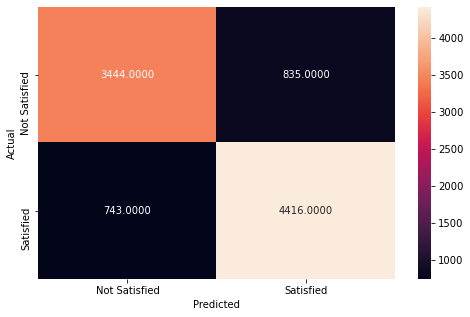

In [426]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations:**
- As we can see from the Confusion Matrix, **this model identifies the majority of passengers who are at likely to be satisfied by the company's services.**
- **We are getting an accuracy of around 83%** on train and test dataset.
- **The precision for this model is around 84% for class 1 on train and 84% on test.**
- **this model will perform fairly well** in differentiating out those passengers who have a high chance of being satisfied,and therefore increasing the likelyhood of increasing the rate of loyal customers.


**Let's check the coefficients and find which variables are leading to satisfaction and which can help to increase the rate of satisfied passengers.**

In [427]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
Onboard_Entertainment,0.921861
Customer_Type,0.645965
Travel_Class,0.436798
Ease_of_Online_Booking,0.374604
CheckIn_Service,0.352149
Onboard_Service,0.342766
Seat_Comfort,0.324863
Legroom,0.281027
Type_Travel,0.237946
Online_Boarding,0.184852


**Observations:**


Features which **positively affect** on the satisfaction rate are:
- Onboard_Entertainment	
- Customer_Type	
- Travel_Class	
- Ease_of_Online_Booking	
- CheckIn_Service	
- Onboard_Service	
- Seat_Comfort	
- Legroom	
- Type_Travel	
- Online_Boarding	
- Online_Support	
- Baggage_Handling	
- Platform_Location	
- Cleanliness

Features which **negatively affect** on the satisfaction rate are:
- Seat_Class	
- Age	
- Travel_Distance	
- Onboard_Wifi_Service	
- Departure_Delay_in_Mins
- Catering	
- Arrival_Time_Convenient	
- Gender_Male	

**Observations:**

- Based on the Logistic Regression model, **Onboard_Entertainment is the most important feature** in detecting whether  a passenger had a positive or a negative overall travel experience.

The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [428]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = False) 

,odds
Onboard_Entertainment,2.513964
Customer_Type,1.907828
Travel_Class,1.547744
Ease_of_Online_Booking,1.454415
CheckIn_Service,1.422121
Onboard_Service,1.408839
Seat_Comfort,1.383841
Legroom,1.324490
Type_Travel,1.268641
Online_Boarding,1.203041


**Observations**
- The odds of a passenger using Onboard_Entertainment to be satisfied are **2.5 times** the odds of one who is not.
- The odds of a passenger who is a loyal customer is almost **twice**  the odds of a passenger who is not.


### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

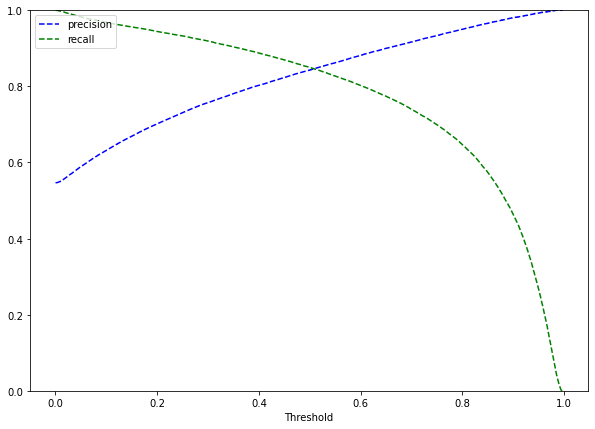

In [429]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.5**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     38507
           1       0.84      0.85      0.85     46434

    accuracy                           0.83     84941
   macro avg       0.83      0.83      0.83     84941
weighted avg       0.83      0.83      0.83     84941



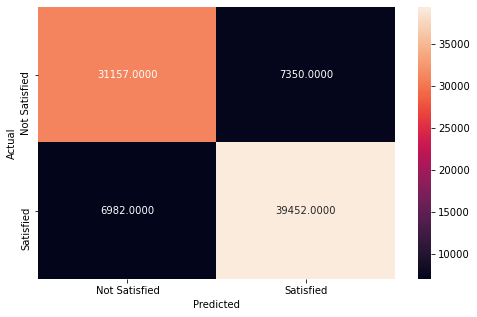

In [430]:
optimal_threshold=.5
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations**
- **The model performance has not improved. The accuracy is still 0.83.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4279
           1       0.84      0.86      0.85      5159

    accuracy                           0.83      9438
   macro avg       0.83      0.83      0.83      9438
weighted avg       0.83      0.83      0.83      9438



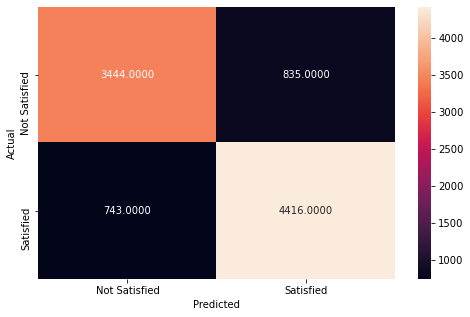

In [431]:
optimal_threshold=.5
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observation:**
- The model is giving **similar performance on the test and train data** as the previous.


### **Support Vector Machines**

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [432]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     38507
           1       0.85      0.85      0.85     46434

    accuracy                           0.84     84941
   macro avg       0.83      0.83      0.83     84941
weighted avg       0.84      0.84      0.84     84941



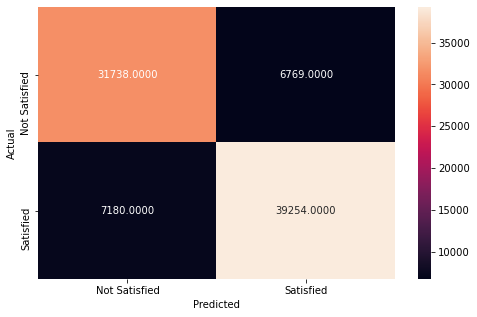

In [433]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4279
           1       0.85      0.85      0.85      5159

    accuracy                           0.84      9438
   macro avg       0.84      0.84      0.84      9438
weighted avg       0.84      0.84      0.84      9438



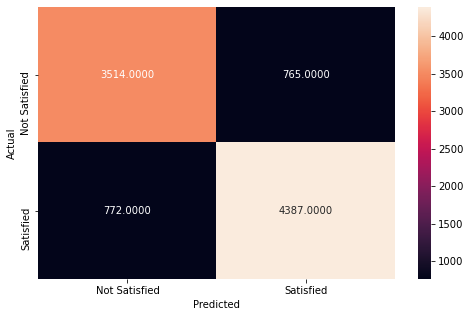

In [434]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

* SVM model with **linear kernel** is not overfitting as the accuracy is around 84% for both train and test dataset



#### **RBF Kernel**

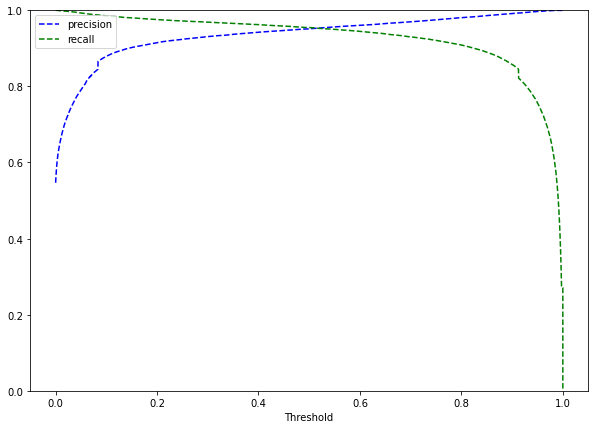

In [435]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     38507
           1       0.96      0.94      0.95     46434

    accuracy                           0.95     84941
   macro avg       0.95      0.95      0.95     84941
weighted avg       0.95      0.95      0.95     84941



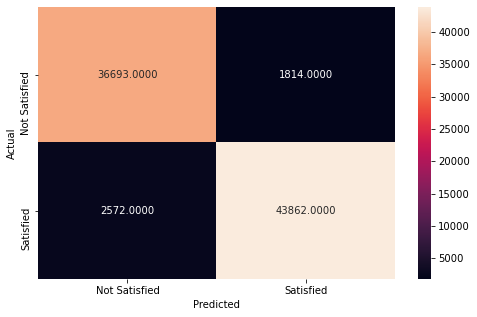

In [436]:
optimal_threshold_svm=.6
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4279
           1       0.95      0.93      0.94      5159

    accuracy                           0.94      9438
   macro avg       0.94      0.94      0.94      9438
weighted avg       0.94      0.94      0.94      9438



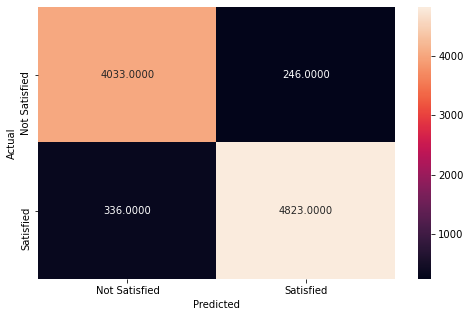

In [437]:
optimal_threshold_svm=.6
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

* At the optimal threshold of .5, the model performance has improved significantly. The accuracy has improved  from 0.84 to .94.
* Moreover, the kernel used is rbf, so the model performs well with a non-linear kernel.

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.** 
* the frequency of class 0 is about 45% and the frequency of class 1 is 55%, then class 1 will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.55, 1:0.45} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [438]:
(train['Overall_Experience'].value_counts())*100/train.shape[0]

1    54.665763
0    45.334237
Name: Overall_Experience, dtype: float64

In [439]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

In [440]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38507
           1       1.00      1.00      1.00     46434

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



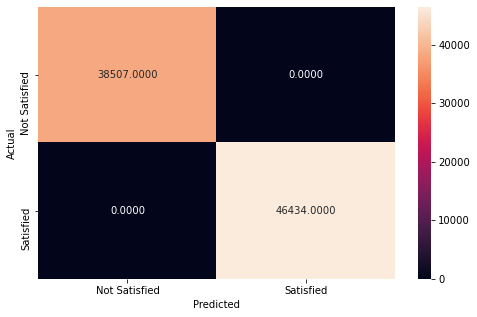

In [441]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4279
           1       0.93      0.94      0.93      5159

    accuracy                           0.93      9438
   macro avg       0.93      0.93      0.93      9438
weighted avg       0.93      0.93      0.93      9438



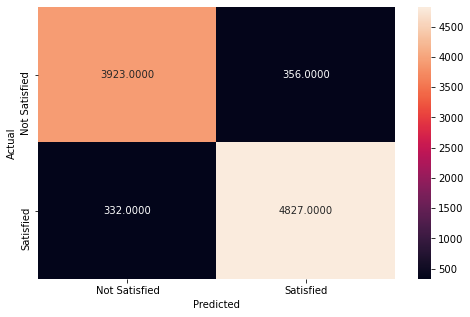

In [442]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the precision is 0.93 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.


**Let's plot the feature importance and check the most important features.**

<AxesSubplot:xlabel='Importance'>

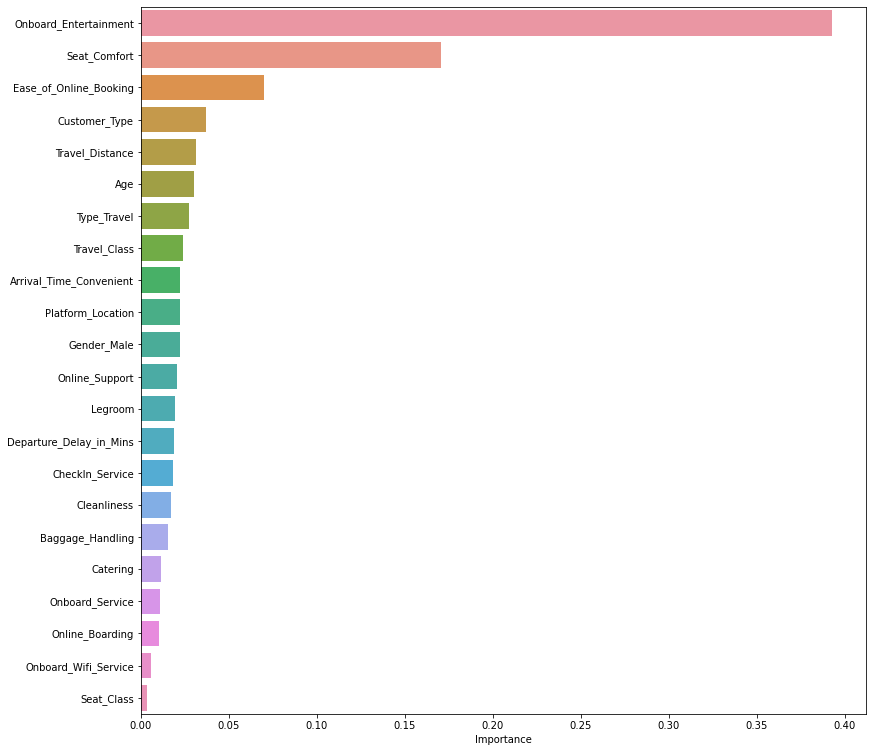

In [443]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- According to the Decision Tree, **Onboard_Entertainment is the most important feature, followed by Seat_Comfort, Esase_of_Online_Booking, Customer_Type and Age.** 

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

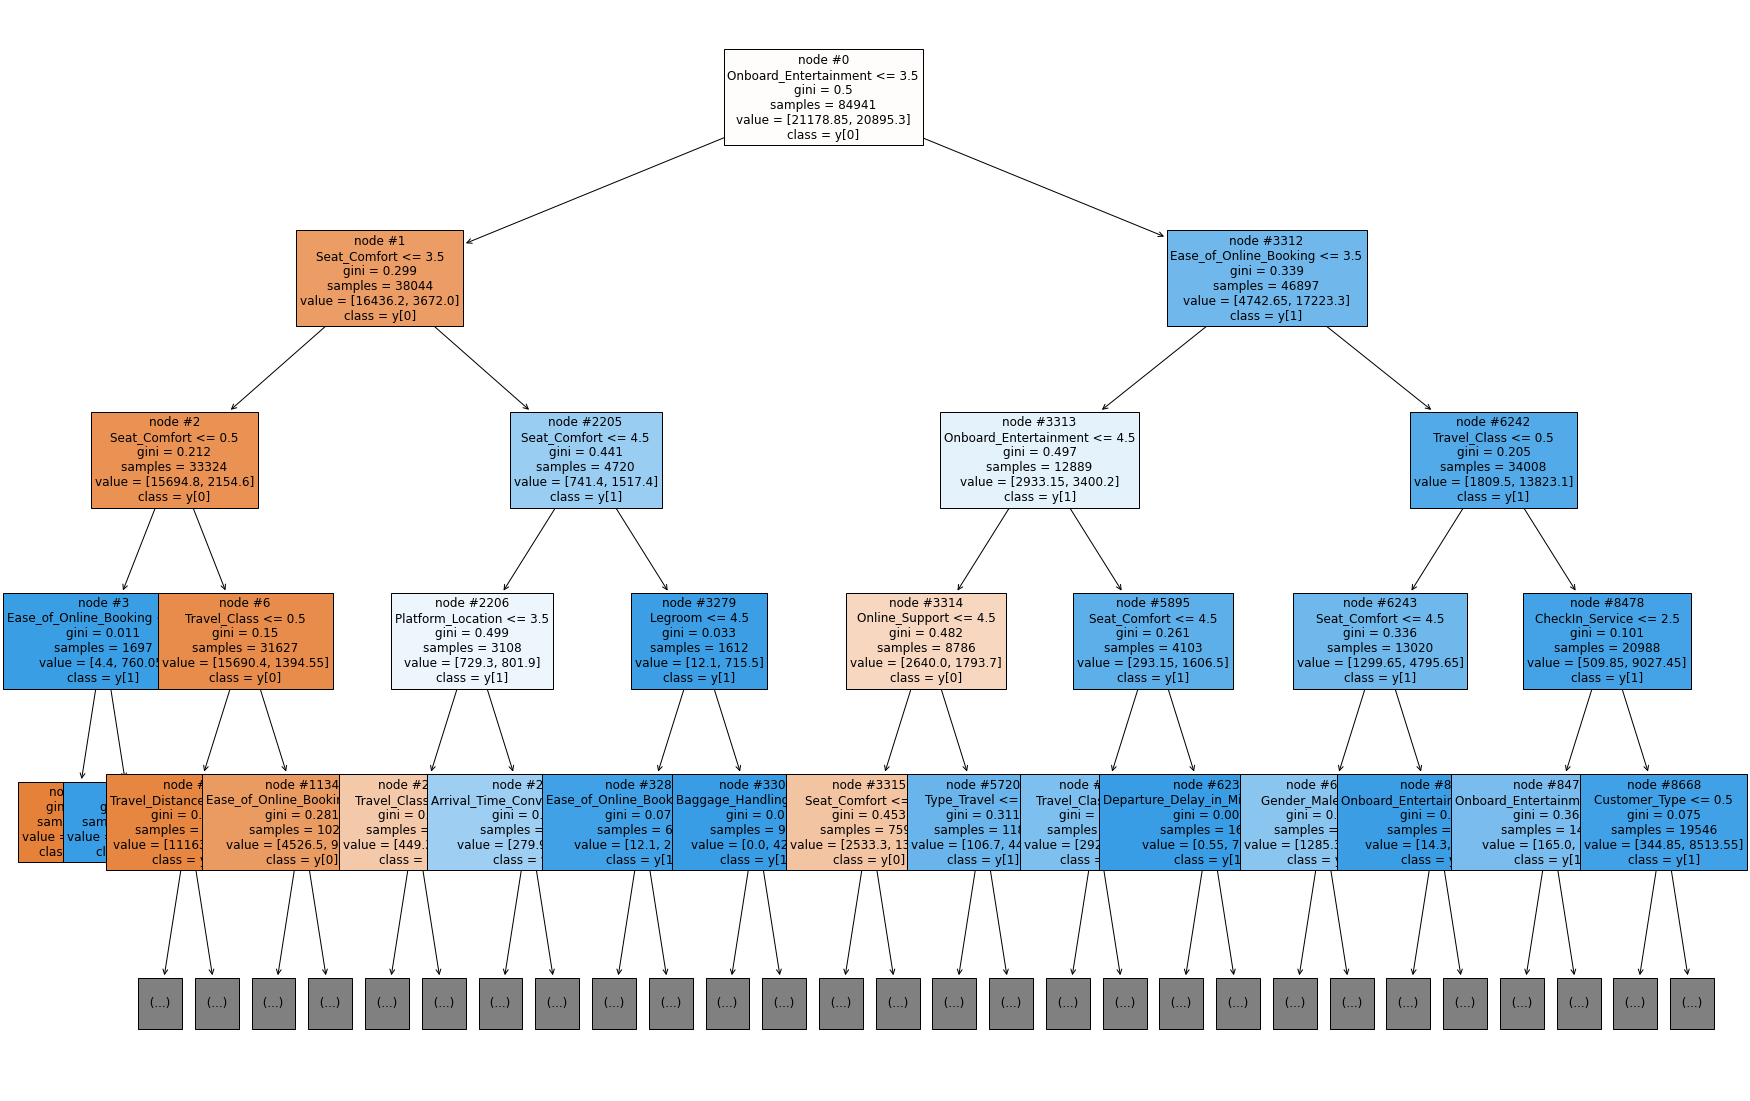

In [444]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the attrition, i.e., **y[1]** and the orange leaves represent the non-attrition, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

## **Hyperparameter Tuning**

We will use  GridSearch CV to perform hyperparameter tuning on our decision tree model. 

In [445]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='accuracy',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=21,
                       max_leaf_nodes=250, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     38507
           1       0.96      0.93      0.95     46434

    accuracy                           0.94     84941
   macro avg       0.94      0.94      0.94     84941
weighted avg       0.94      0.94      0.94     84941



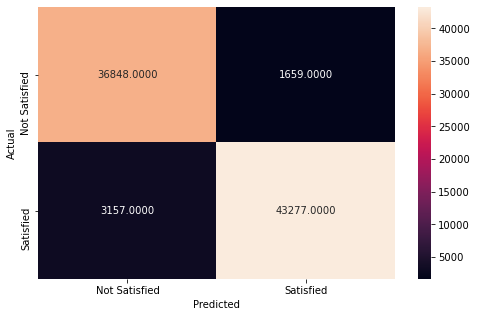

In [446]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

**Checking the model performance of the tuned decision tree on the test data**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4279
           1       0.96      0.92      0.94      5159

    accuracy                           0.93      9438
   macro avg       0.93      0.94      0.93      9438
weighted avg       0.94      0.93      0.93      9438



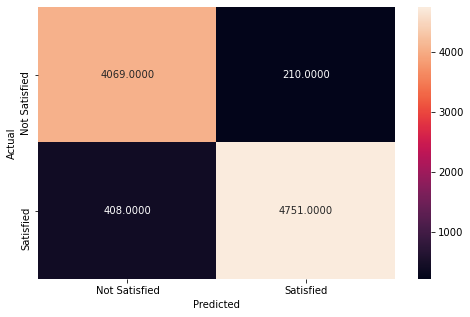

In [447]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observation :**

* The Decision tree model with default parameters was overfitting the training data.
* **Tuning the Decision tree model has improved the performance on test data**, but not significantly. Also, the  overfitting on training data has reduced significantly, but has not completely been resolved. 

**Let's plot the feature importance and check the most important features.**

<AxesSubplot:xlabel='Importance'>

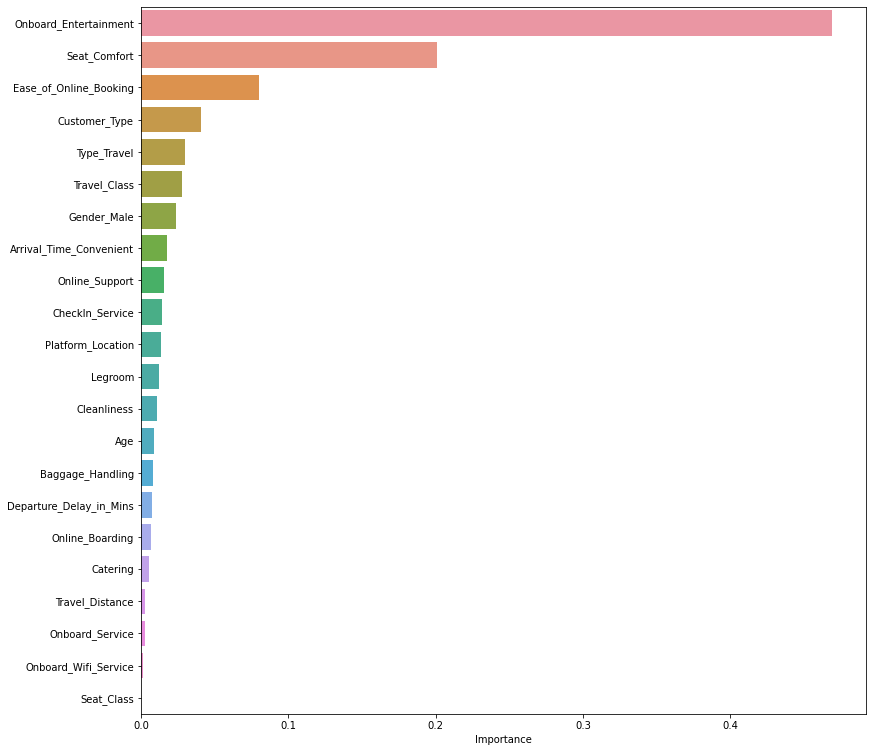

In [448]:
# Plot the feature importance

importances = estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

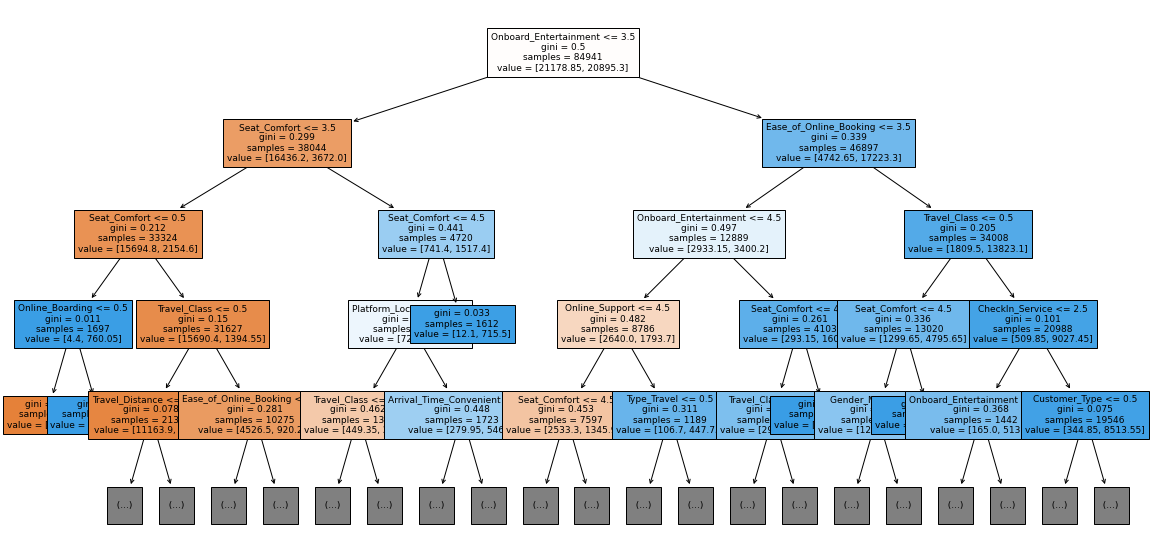

In [449]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Pruning the model

 Now we will try to prune the tree to try to obtain a better accuracy score.

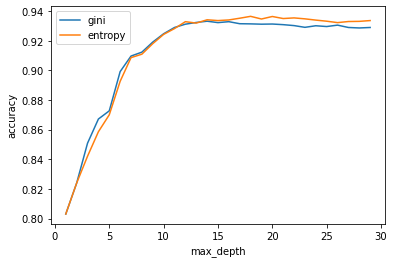

In [450]:
# we'll iterate over 30 max_depths to see which gives the best result
# we'll try out different criterion as well (gini is computationally faster with respect to entropy)
# we'll plot max depth vs accuracy
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i,class_weight = {0: 0.55, 1: 0.45}, random_state = 1)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_gini.append(accuracy_score(y_test,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i,class_weight = {0: 0.55, 1: 0.45}, random_state = 1)
    dtree.fit(X_train,y_train)
    pred=dtree.predict(X_test)
    
    acc_entropy.append(accuracy_score(y_test,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Observation:**

**It looks like gini and entropy perform the same.** **We can see a slight drop in  accuracy as we take max depth greater than 11 and the best accuracy score is obtained at max_depth=11 which is a little over 93% with both the criteria.** Let's build the model with max_depth = 11.

In [451]:
dt_pruned_model=DecisionTreeClassifier(criterion='gini', max_depth=11, class_weight = {0: 0.55, 1: 0.45}, random_state = 1)
dt_pruned_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=11,
                       random_state=1)

In [452]:
dt_pruned_model_pred=dt_pruned_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     38507
           1       0.96      0.94      0.95     46434

    accuracy                           0.94     84941
   macro avg       0.94      0.94      0.94     84941
weighted avg       0.94      0.94      0.94     84941



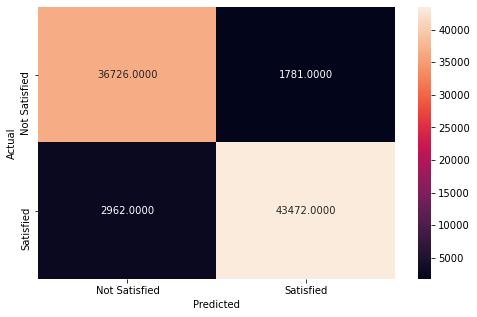

In [453]:
# Checking performance on the training dataset
dt_pruned = dt_pruned_model.predict(X_train)
metrics_score(y_train,dt_pruned)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4279
           1       0.95      0.92      0.93      5159

    accuracy                           0.93      9438
   macro avg       0.93      0.93      0.93      9438
weighted avg       0.93      0.93      0.93      9438



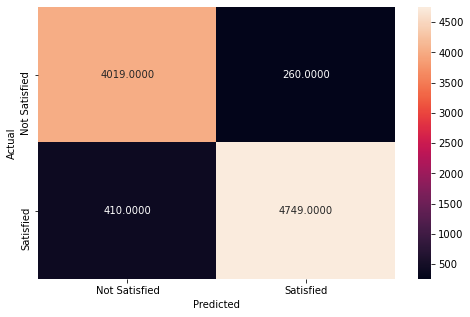

In [454]:
# Checking performance on the training dataset
y_pred_pruned = dt_pruned_model.predict(X_test)
metrics_score(y_test,y_pred_pruned)

### **Random Forest**

- **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 
- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).**

In [455]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38507
           1       1.00      1.00      1.00     46434

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



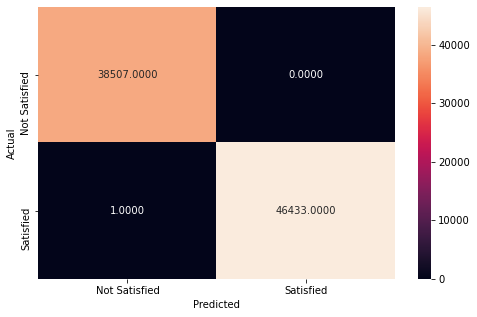

In [456]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4279
           1       0.96      0.94      0.95      5159

    accuracy                           0.95      9438
   macro avg       0.95      0.95      0.95      9438
weighted avg       0.95      0.95      0.95      9438



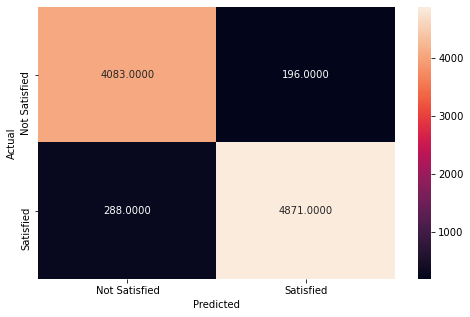

In [457]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be slightly overfitting the training data**. The accuracy on the training data is 1, while the accuracy on the test data is only ~ 0.95 for class 1.
- Both recall and Precision is high for the test data as well. Good performing model. 

**Let's check the feature importance of the Random Forest**

<AxesSubplot:xlabel='Importance'>

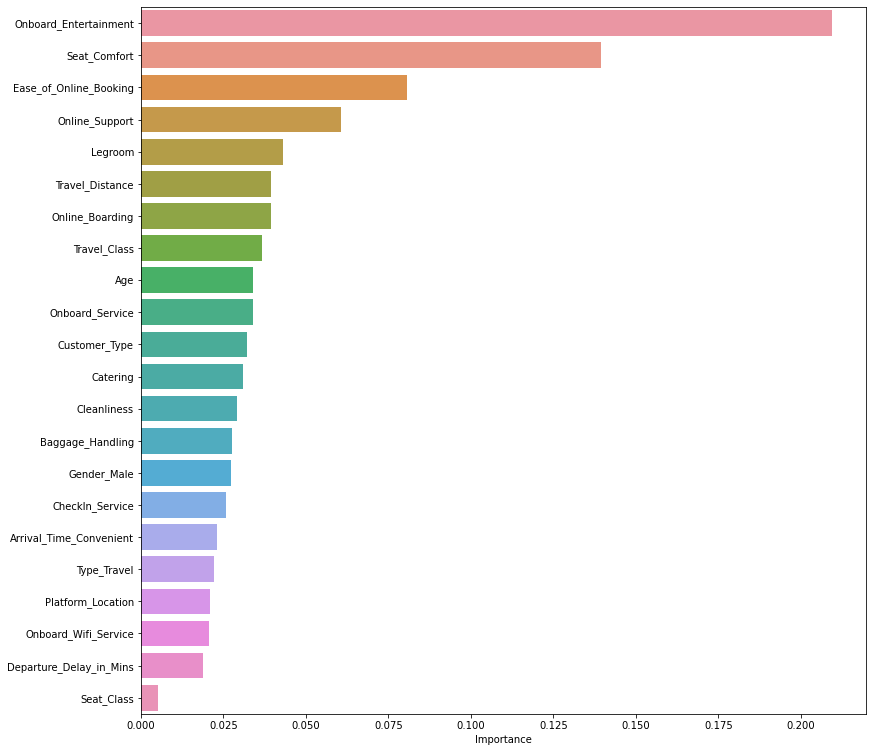

In [458]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**


- The Random Forest further verifies the results from the decision tree that the most important features are `Onboard_Entertainment`, `Seat_Comfort` and `Ease_of_Online_Booking`.
- We can say that the passengers appear to be satistied with their travel mostly because of the quality of these services and services such as `Legroom` and `Online_Boarding`.

## Hyperparameter tuning

 Let's use  GridSearch CV again to perform hyperparameter tuning on our Random Forest model. 

In [459]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(accuracy_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [460]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, max_features=0.7,
                       random_state=1)

**Let's check the model performance of the tuned Random Forest on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38507
           1       1.00      1.00      1.00     46434

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



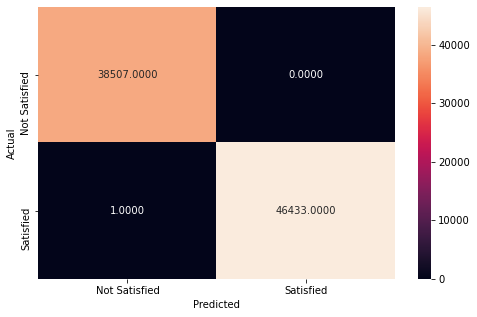

In [461]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

**Let's check the model performance of the tuned Random Forest on the test data**

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4279
           1       0.96      0.95      0.96      5159

    accuracy                           0.95      9438
   macro avg       0.95      0.95      0.95      9438
weighted avg       0.95      0.95      0.95      9438



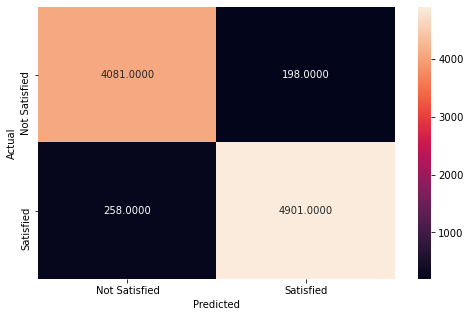

In [462]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- Tuning the Random Forest classifier **did not improve the accuracy score**. Let's prune the trees in the random forest  model to see if the accuracy score will increase.


## **Model Comparison**
**Let's compare these models based on how much their recall score on the test data compare with their recall score on train data.**

In [463]:
models = pd.DataFrame(columns=["Model","accuracy_score Test"])

In [464]:
y_pred_test_lg = lg.predict_proba(X_test_scaled)
y_pred_test_svmrbf = svm_rbf.predict_proba(X_test_scaled)


In [465]:

dt_accuracy = (accuracy_score(y_test, y_test_pred_dt) * 100)

dt_tuned_accuracy = (accuracy_score(y_test,y_pred_tuned) * 100)

dt_pruned_accuracy = (accuracy_score(y_test, y_pred_pruned) * 100)

rf_accuracy = (accuracy_score(y_test,y_pred_test_rf) * 100)

rf_tuned_accuracy = (accuracy_score(y_test,y_pred_test_rf_tuned) * 100)
rf_pruned_accuracy = (accuracy_score(y_test, y_pred_test_rf_pruned) * 100)

NameError: name 'y_pred_test_rf_pruned' is not defined

In [ ]:
new_row = {"Model": "Decision Tree","accuracy_score Test": dt_accuracy}
models = models.append(new_row, ignore_index=True)
new_row = {"Model": "Tuned Decision Tree","accuracy_score Test": dt_tuned_accuracy}
models = models.append(new_row, ignore_index=True)
new_row = {"Model": "Pruned Decision Tree","accuracy_score Test": dt_pruned_accuracy}
models = models.append(new_row, ignore_index=True)
new_row = {"Model": "Random forest","accuracy_score Test": rf_accuracy}
models = models.append(new_row, ignore_index=True)
new_row = {"Model": "Tuned Random forest","accuracy_score Test": rf_tuned_accuracy}
models = models.append(new_row, ignore_index=True)

In [ ]:
models.sort_values(by='accuracy_score Test', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

## **Conclusions:**

- We have tried multiple models and were **able to identify the key factors involved with passengers'satisfaction** in travelling with the Bullet train.
- All these models perform well, but **The Random forest model** has the highest accuracy score.

## **Recommendations:**

- We saw from all these models that **Onboard Entertainment is the most important feature for passemgers'satisfaction.** The company should increase the quality of the products entartaining passengers.
- Among the other important actions the company should take to satisfy their customers, they should focus in improving  **Seat_Comfort**, **Ease_of_Online_Booking** and **Online_Boarding**.

## Making Predictions of the Test Set

In [ ]:
test1 = pd.merge(survey_test, travel_test, how='outer')

In [ ]:
Prediction = svm_rbf.predict_proba.predict(test_scaled)

In [ ]:
test1["Prediction"]= Prediction

In [ ]:
test1.shape

In [ ]:
output=pd.DataFrame(data={"ID":test1["ID"],"Overall_Experience":test1["Prediction"]})

In [ ]:
output.set_index('ID', inplace=True)

In [ ]:
output

In [ ]:
output.to_csv("My_prediction_results4.csv")

--------------------------------

In [ ]:
Prediction2 = rf_estimator.predict(test_scaled)

In [ ]:
test1["Prediction2"]= Prediction2

In [ ]:
output2=pd.DataFrame(data={"ID":test1["ID"],"Overall_Experience":test1["Prediction2"]})

In [ ]:
output2.set_index('ID', inplace=True)

In [ ]:
output2.to_csv("My_prediction_results5.csv")

In [ ]:
Prediction3 = dt_pruned_model.predict(test_scaled)

In [ ]:
test1["Prediction3"]= Prediction3

In [ ]:
output3=pd.DataFrame(data={"ID":test1["ID"],"Overall_Experience":test1["Prediction3"]})

In [ ]:
output3.set_index('ID', inplace=True)

In [ ]:
output3.to_csv("My_prediction_results6.csv")